In [ ]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import spaCy and load the language library
import spacy
from nltk.corpus import stopwords 
nlp = spacy.load('en_core_web_sm')

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
with open('train.txt','r') as txt:
    train=txt.readlines()

In [ ]:
train[0:5]

['i didnt feel humiliated;sadness\n',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n',
 'im grabbing a minute to post i feel greedy wrong;anger\n',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n',
 'i am feeling grouchy;anger\n']

In [ ]:
#function_box
def feel(v):
    m=np.argmax(v)
    if m==0:
     r=yq[0]
    elif m==1:
     r=yq[1]
    elif m==2:
     r=yq[2]
    elif m==3:
     r=yq[3]
    elif m==4:
     r=yq[4]
    elif m==5:
     r=yq[5]
    r=str(r)
    return(r[:-1])

In [ ]:
def sec_feel(v):
  v1=v.remove(max(v))
  return(feelings(v1))

In [ ]:
#data_cleaning

In [ ]:
x=[]
y=[]
for i in np.arange(len(train)):
  txt = train[i]
  x1,y1 = txt.split(";")
  x=np.append(x,x1)
  y=np.append(y,y1)

([<matplotlib.patches.Wedge at 0x7f91f1e1af98>,
 [Text(0.8169439102975137, 1.43356292063788, 'joy\n'),
  Text(-1.638178996633928, 0.1971536836771195, 'sadness\n'),
  Text(-0.5665314898812484, -1.5496909598280986, 'anger\n'),
  Text(0.7232799305739157, -1.4830260085477234, 'fear\n'),
  Text(1.463035575191684, -0.7629068788020849, 'love\n'),
  Text(1.6396043984418984, -0.18492543527049307, 'surprise\n')])

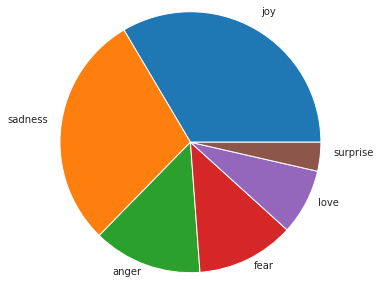

In [ ]:
sdf=DataFrame(DataFrame(y)[0].value_counts())
plt.pie(sdf[0].values,labels=sdf.index,radius=1.5)

In [ ]:
stop_words.update(['im','didnt','ive','feel','feeling'])      #feel can also be added in future if required
corpus=[]
for j in np.arange(len(x)):
  txt=(str(x[j]))
  txt1=""
  for  i in txt.split(" "):
     if i not in (stop_words):
      txt1=txt1+"".join(i)+" "
  corpus=np.append(corpus,txt1)

In [ ]:
c=nlp(str(corpus))
print(c)

['humiliated ' 'go hopeless damned hopeful around someone cares awake '
 'grabbing minute post greedy wrong ' ... 'strong good overall '
 'like rude comment glad ' 'know lot stupid portray ']


In [ ]:
cr=[]
c=(corpus)
for i in np.arange(len(c)):
  c11=nlp(str(c[i]))
  c1=" ".join([token.lemma_ for token in c11])
  cr=np.append(cr,c1)

In [ ]:
cr

array(['humiliate',
       'go hopeless damned hopeful around someone care awake',
       'grab minute post greedy wrong', ..., 'strong good overall',
       'like rude comment glad', 'know lot stupid portray'], dtype='<U215')

In [ ]:
yq=np.unique(y)
yq

array(['anger\n', 'fear\n', 'joy\n', 'love\n', 'sadness\n', 'surprise\n'],
      dtype='<U32')

In [ ]:
#ML_algo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
pmodel_svm = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                       ('clf', SVC(kernel='linear'))])

In [ ]:
pmodel_svm.fit(cr,y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all'...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=

In [ ]:
y_pre=pmodel_svm.predict(cr)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
#DataFrame(confusion_matrix(y_pre,y),columns=yq,index=yq)
#print(classification_report(y_pre,y))
accuracy_score(y_pre,y)

In [ ]:
pmodel_svm.predict(["unexpexted it was and fearfull as well"])     #so the model definetly needs some tuning

array(['joy\n'], dtype='<U32')

In [ ]:
#importing test data

In [ ]:
with open('test.txt','r') as txt:
    test=txt.readlines()

In [ ]:
xt=[]
yt=[]
for i in np.arange(len(test)):
  txt = test[i]
  xt1,yt1 = txt.split(";")
  xt=np.append(xt,xt1)
  yt=np.append(yt,yt1)

In [ ]:
corpus_t=[]
for j in np.arange(len(xt)):
  txt=(str(xt[j]))
  txt1=""
  for  i in txt.split(" "):
     if i not in (stop_words):
      txt1=txt1+"".join(i)+" "
  corpus_t=np.append(corpus_t,txt1)

In [ ]:
cr_t=[]
ct=(corpus_t)
for i in np.arange(len(ct)):
  c11=nlp(str(ct[i]))
  c1=" ".join([token.lemma_ for token in c11])
  cr_t=np.append(cr_t,c1)

In [ ]:
y_pre1=pmodel_svm.predict(cr_t)

In [ ]:
#DataFrame(confusion_matrix(y_pre1,yt),columns=yq,index=yq)
#print(classification_report(y_pre1,yt))
#accuracy_score(y_pre1,yt)       #94 on train and 86 in test is a clear indication of overfitting we 
                                 #need to deal with that as well

In [ ]:
# so the points i observed here was that
# the data is overfittted
#urgently needs tuning

In [ ]:
#DL 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tt=TfidfVectorizer(stop_words=stop_words)
tt1=tt.fit_transform(cr)
tt2=tt1.shape

In [ ]:
nn_len=tt2[1]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cr)
vocabulary_size = len(tokenizer.word_counts)

def nn_model(vocabulary_size, nn_len):
    model = Sequential()
    model.add(Dense(8, input_dim=nn_len, kernel_initializer = 'uniform',activation='relu'))
    model.add(Dropout(rate=.3))
    model.add(Dense(6, input_dim=8, activation='relu'))
    #classifier.add(Dropout(rate=.1))
    model.add(Dense(output_dim = 6, activation = 'softmax'))   #output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])     
    return model

In [ ]:
pmodel_nn = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,decode_error='loose')),
                       ('nn_mo', nn_model(np.exp(50000),nn_len))])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=6)`
  if sys.path[0] == '':


In [ ]:
tfn=TfidfVectorizer(stop_words=stop_words)
xnn=tfn.fit_transform(cr)

df1=pd.get_dummies(y)
ynn=df1.values

In [ ]:
pmodel_nn.fit(cr,ynn)
pmodel_nn.fit(cr,ynn)
pmodel_nn.fit(cr,ynn)
pmodel_nn.fit(cr,ynn)

Epoch 1/1
16000/16000 [==============================] - 2s 132us/step - loss: 1.5480 - accuracy: 0.3319
Epoch 1/1
16000/16000 [==============================] - 2s 125us/step - loss: 1.2589 - accuracy: 0.4391
Epoch 1/1
16000/16000 [==============================] - 2s 127us/step - loss: 0.9716 - accuracy: 0.6608
Epoch 1/1
16000/16000 [==============================] - 2s 129us/step - loss: 0.7413 - accuracy: 0.7590


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='loose',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
               

In [ ]:
y_pre=pmodel_nn.predict(cr)
ynn_pre=[]
for i in np.arange(len(y)):
   ynn_pre=np.append(ynn_pre,np.argmax(y_pre[i]))

In [ ]:
yn=[]
for i in np.arange(len(y)):
   yn=np.append(yn,np.argmax(ynn[i]))

In [ ]:
#DataFrame([y,yn,ynn_pre]).T.head(5)
#DataFrame(confusion_matrix(y_pre,y),columns=yq,index=yq)
print(classification_report(ynn_pre,yn))
#accuracy_score(y_pre,y)

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84      2620
         1.0       0.95      0.61      0.74      3019
         2.0       0.97      0.95      0.96      5510
         3.0       0.04      0.70      0.08        81
         4.0       0.96      0.94      0.95      4770
         5.0       0.00      0.00      0.00         0

    accuracy                           0.85     16000
   macro avg       0.64      0.66      0.60     16000
weighted avg       0.95      0.85      0.89     16000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
DataFrame(confusion_matrix(ynn_pre,yn),columns=yq,index=yq)

,anger\n,fear\n,joy\n,love\n,sadness\n,surprise\n
anger\n,1996,45,9,76,43,451
fear\n,40,1844,31,983,22,99
joy\n,8,26,5208,155,103,10
love\n,4,9,4,57,6,1
sadness\n,111,13,110,33,4492,11
surprise\n,0,0,0,0,0,0


In [ ]:
accuracy_score(ynn_pre,yn)

0.8498125

In [ ]:
accuracy_score(ynn_pre1,yt_n)         # clearly overfitting is present

0.7765

In [ ]:
with open('test.txt','r') as txt:
    test=txt.readlines()

In [ ]:
xt=[]
yt=[]
for i in np.arange(len(test)):
  txt = test[i]
  xt1,yt1 = txt.split(";")
  xt=np.append(xt,xt1)
  yt=np.append(yt,yt1)
corpus_t=[]
for j in np.arange(len(xt)):
  txt=(str(xt[j]))
  txt1=""
  for  i in txt.split(" "):
     if i not in (stop_words):
      txt1=txt1+"".join(i)+" "
  corpus_t=np.append(corpus_t,txt1)
cr_t=[]
ct=(corpus_t)
for i in np.arange(len(ct)):
  c11=nlp(str(ct[i]))
  c1=" ".join([token.lemma_ for token in c11])
  cr_t=np.append(cr_t,c1)
ynn_pre2=pmodel_nn.predict(cr_t)
ynn_pre1=[]
for i in np.arange(len(ynn_pre2)):
   ynn_pre1=np.append(ynn_pre1,np.argmax(ynn_pre2[i]))
yt_n=[]
for i in np.arange(len(yt)):
    if yt[i]==yq[0]:
      yt_n=np.append(yt_n,0)
    elif yt[i]==yq[1]:
      yt_n=np.append(yt_n,1)
    elif yt[i]==yq[2]:
      yt_n=np.append(yt_n,2)
    elif yt[i]==yq[3]:
      yt_n=np.append(yt_n,3)
    elif yt[i]==yq[4]:
      yt_n=np.append(yt_n,4)
    elif yt[i]==yq[5]:
      yt_n=np.append(yt_n,5)

In [ ]:

DataFrame([yt,yt_n,ynn_pre1]).T.head()

,0,1,2
0,sadness\n,4,4
1,sadness\n,4,4
2,sadness\n,4,4
3,joy\n,2,2
4,sadness\n,4,4


In [ ]:

DataFrame(confusion_matrix(ynn_pre1,yt_n),columns=yq,index=yq)

,anger\n,fear\n,joy\n,love\n,sadness\n,surprise\n
anger\n,200,15,7,14,14,33
fear\n,14,182,21,77,3,20
joy\n,7,11,649,47,45,5
love\n,0,2,6,5,2,1
sadness\n,54,14,12,16,517,7
surprise\n,0,0,0,0,0,0


In [ ]:
accuracy_score(ynn_pre1,yt_n)          # clearly overfitting is present

0.698

In [ ]:
feel(pmodel_nn.predict(["open your eyes and see the reality of the world"]))

'sadness'

In [ ]:
feel(pmodel_nn.predict(["hello dear i have been searching for you from a long time"]))

'anger'

In [ ]:
feel(pmodel_nn.predict(["this is me and my life you dont worry"]))

'joy'

In [ ]:
#padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
#    mat3, padding="post"
#)
#print(padded_inputs)

In [ ]:

from keras.preprocessing.text import Tokenizer
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cr)
#sequences = tokenizer.texts_to_sequences(text_sequences)
vocabulary_size = len(tokenizer.word_counts)
from keras.utils import to_categorical
#tfn=TfidfVectorizer(stop_words=stop_words)
#xnn=tfn.fit_transform(cr)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

pmodel_nn = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                       ('nn_mo', nn_model(132000,12324))])



with open('test.txt','r') as txt:
    test=txt.readlines()

xt=[]
yt=[]
for i in np.arange(len(test)):
  txt = test[i]
  xt1,yt1 = txt.split(";")
  xt=np.append(xt,xt1)
  yt=np.append(yt,yt1)

corpus_t=[]
for j in np.arange(len(xt)):
  txt=(str(xt[j]))
  txt1=""
  for  i in txt.split(" "):
     if i not in (stop_words):
      txt1=txt1+"".join(i)+" "
  corpus_t=np.append(corpus_t,txt1)

cr_t=[]
ct=(corpus_t)
for i in np.arange(len(ct)):
  c11=nlp(str(ct[i]))
  c1=" ".join([token.lemma_ for token in c11])
  cr_t=np.append(cr_t,c1)

y_pre1=pmodel_svm.predict(cr_t)


############################################

def nn_model(vocabulary_size, nn_len):
    model = Sequential()
    model.add(Dense(10, input_dim=nn_len, kernel_initializer = 'uniform',activation='relu'))
    model.add(Dense(6, input_dim=10, activation='relu'))
    model.add(Dense(6, input_dim=14, activation='relu'))
    model.add(Dense(output_dim = 6, activation = 'softmax'))   #output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])     
    return model